In [1]:

import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [158]:
pip install -U scikit-learn

In [19]:
conda install -c conda-forge imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/noarch::nltk==3.6.5=pyhd3eb1b0_0
  - defaults/win-64::scikit-learn-intelex==2021.3.0=py39haa95532_0

The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/noarch::nltk==3.6.5=pyhd3eb1b0_0
  - defaults/win-64::scikit-learn-intelex==2021.3.0=py39haa95532_0


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\mario\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2021.11  |           py39_0           7 KB
    anaconda-custom            |           py39_1           4 KB
    ca-certificates-2022.12.7  |       h5b45459_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    conda-4.12.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    imbalanced-learn-0.10.1    |     pyhd8ed1ab_0         131 KB  conda-forge
    joblib-1.2.0               

# Классификация музыкальных композиций по жанрам

## 1. Загрузить данные

In [2]:
#import io
data_raw = pd.read_csv('train.csv')

Размер таблицы

In [3]:
data_raw.shape

(17996, 17)

In [4]:
data_raw.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Ифнормация по столбцам

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

## 2. Описание задачи
**Artist Name** - имя исполнителя         
**Track Name** - название трека          
**Popularity** - популярность         
**danceability** - танцевальность        
**energy** - энергия              
**key**  - клавишность              
**loudness** - громкость            
**mode** - режим                
**speechiness** - речь         
**acousticness** - акустика        
**instrumentalness** - инструментальность   
**liveness** - живой звук           
**valence** - валентность             
**tempo** - темп            
**duration_in min/ms** - дюрация  
**time_signature** - время       
**Class** - класс 


Признаки Artist Name, Track Name - номинальные , Mode - бинарный, 
остальные признаки (включая целевой признак Class) - количественный (числовой).

Требуется предсказать количественный признак Class по остальным признакам. Это задача классификации.




In [6]:
data_raw

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [7]:
#Заменим объектный тип на специальный категориальный

data_raw['Artist Name'] = data_raw['Artist Name'].astype('category')
data_raw['Track Name'] = data_raw['Track Name'].astype('category')

In [10]:
#информация по числовым признакам
data_raw.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [11]:
data_raw.describe(include=['category'])

,Artist Name,Track Name
count,17996,17996
unique,9149,15129
top,Backstreet Boys,Dreams
freq,69,9


## 3. Пропуски


In [12]:
data_raw.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [13]:
# Заменим пропуски медианой
feat = ['Popularity', 'key', 'instrumentalness']
data_raw[feat].median(axis = 0)

Popularity          44.00000
key                  6.00000
instrumentalness     0.00391
dtype: float64

In [14]:
data_raw[feat] = data_raw[feat].fillna(data_raw[feat].median(axis = 0), axis=0)

In [15]:
data_raw.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [16]:
#Распределение по классам
i_mass =[]
per_mass = []
for i in range (11):
    count_no_class = len(data_raw[data_raw['Class']!=i])
    count_class = len(data_raw[data_raw['Class']==i])
    pct = count_class/(count_no_class + count_class)
    print(i, pct*100)
    i_mass.append (i)
    per_mass.append (pct*100)
    

    

0 3.4729939986663703
1 7.6294732162702825
2 7.068237386085798
3 2.2338297399422093
4 2.1504778839742165
5 8.04067570571238
6 14.37541675927984
7 3.200711269170927
8 10.302289397643921
9 14.02533896421427
10 27.500555679039785


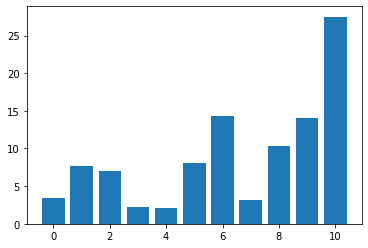

In [17]:
plt.bar(i_mass,per_mass)
plt.show()

Из гистограммы видно, что классы не сбалансированы

## 4. Разбиваем на train и test

In [169]:
#Заменим категориальный признак на числовой
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(drop='if_binary', sparse=False)
#enc.fit(data_raw[['Artist Name']])

In [171]:
#tokens = enc.get_feature_names_out()
#dummies = pd.DataFrame(enc.transform(data_raw[['Artist Name']]), columns= tokens, 
#                       index=data_raw.index)
#dummies.head()


In [105]:
#data_raw = pd.concat((data_raw, dummies), axis=1).drop(['Artist Name'], axis=1)

In [18]:
X = data_raw.drop(['Artist Name','Track Name'], axis=1)
y = data_raw['Class']

In [19]:
# Разобьем данные 75% - обучающая выборка, 25% - тестовая 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(13497, 4499)

In [20]:
#Распределение по классам
i_mass =[]
per_mass = []
for i in range (11):
    count_no_class = len(X_train[X_train['Class']!=i])
    count_class = len(X_train[X_train['Class']==i])
    pct = count_class/(count_no_class + count_class)
    print(i, pct*100)
    i_mass.append (i)
    per_mass.append (pct*100)

0 3.3563014003111804
1 7.653552641327703
2 6.905238201081722
3 2.2078980514188338
4 2.2449433207379417
5 8.2018226272505
6 14.529154626954139
7 3.2748018078091428
8 10.231903385937615
9 13.788249240571979
10 27.606134696599245


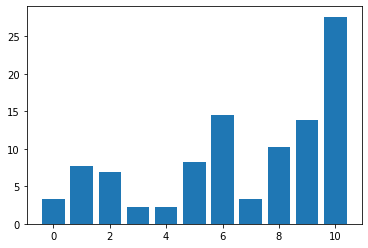

In [21]:
plt.bar(i_mass,per_mass)
plt.show()

In [22]:
#Сбалансируем классы

from imblearn.over_sampling import SMOTE
    

In [ ]:
smt = SMOTE(random_state=1000)
X_train, y_train= smt.fit_sample(X_train, y_train)

In [24]:
N_train, N_test

(13497, 4499)

## 5.Визуализация обучающей выборки

In [25]:
#Основные характеристики параметров
X_train.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,13497.000000,13497.000000,13497.000000,13497.000000,13497.000000,13497.000000,13497.000000,13497.000000,13497.000000,13497.000000,13497.000000,13497.000000,1.349700e+04,13497.000000,13497.000000
mean,44.642884,0.543785,0.663316,5.947988,-7.933572,0.638068,0.080189,0.246254,0.135716,0.195656,0.486823,122.598905,2.003816e+05,3.926206,6.701860
std,17.352919,0.166070,0.234648,3.019295,4.072310,0.480577,0.085045,0.309769,0.275059,0.159373,0.240703,29.535590,1.115334e+05,0.356839,3.194545
min,1.000000,0.059900,0.000020,1.000000,-35.154000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.512000,4.000000,-9.535000,0.000000,0.034800,0.004340,0.000280,0.096900,0.298000,99.592000,1.660400e+05,4.000000,5.000000
50%,44.000000,0.546000,0.701000,6.000000,-7.038000,1.000000,0.047300,0.081400,0.003910,0.129000,0.483000,120.044000,2.089380e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,8.000000,-5.200000,1.000000,0.083100,0.431000,0.058600,0.257000,0.673000,141.971000,2.523470e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Расссотрим зависимость класса от признаков

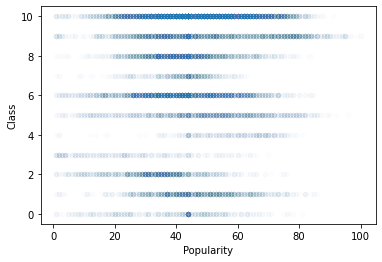

In [26]:
X_train.plot(kind = 'scatter', x = 'Popularity', y = 'Class', alpha=.01)
pass

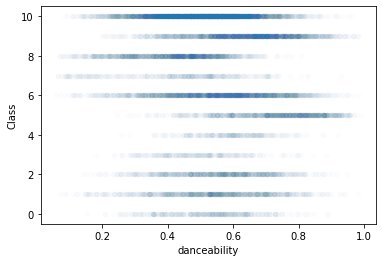

In [27]:
X_train.plot(kind = 'scatter', x = 'danceability', y = 'Class', alpha=.01)
pass

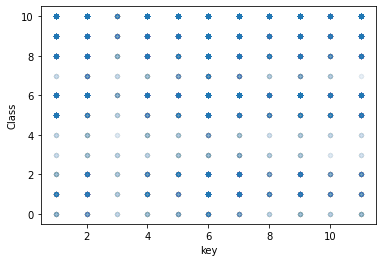

In [28]:
X_train.plot(kind = 'scatter', x = 'key', y = 'Class', alpha=.01)
pass

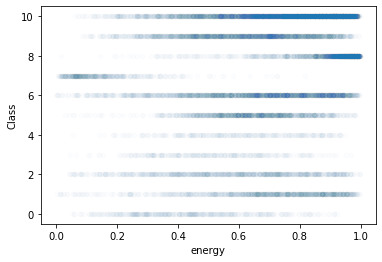

In [29]:
X_train.plot(kind = 'scatter', x = 'energy', y = 'Class', alpha=.01)
pass

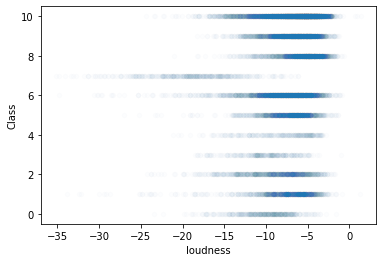

In [30]:
X_train.plot(kind = 'scatter', x = 'loudness', y = 'Class', alpha=.01)
pass

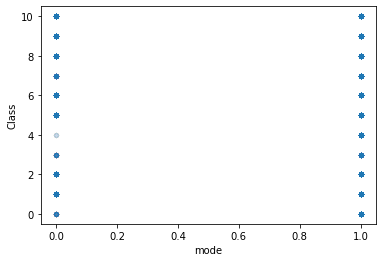

In [31]:
X_train.plot(kind = 'scatter', x = 'mode', y = 'Class', alpha=.01)
pass

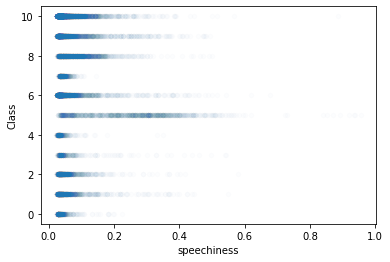

In [32]:
X_train.plot(kind = 'scatter', x = 'speechiness', y = 'Class', alpha=.01)
pass

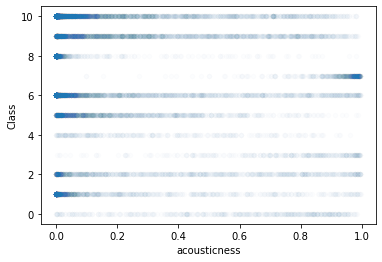

In [33]:
X_train.plot(kind = 'scatter', x = 'acousticness', y = 'Class', alpha=.01)
pass

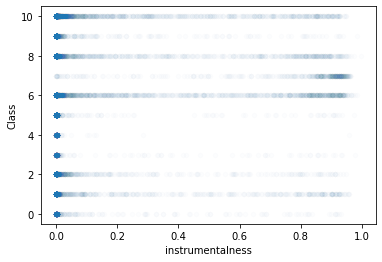

In [34]:
X_train.plot(kind = 'scatter', x = 'instrumentalness', y = 'Class', alpha=.01)
pass

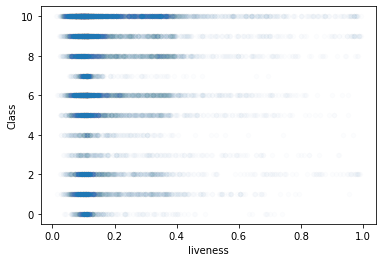

In [35]:
X_train.plot(kind = 'scatter', x = 'liveness', y = 'Class', alpha=.01)
pass

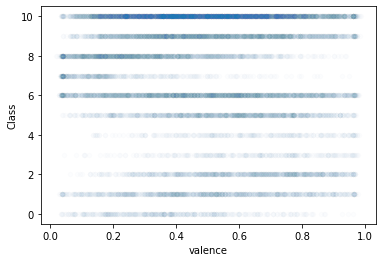

In [36]:
X_train.plot(kind = 'scatter', x = 'valence', y = 'Class', alpha=.01)
pass

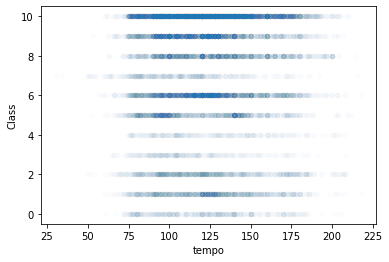

In [37]:
X_train.plot(kind = 'scatter', x = 'tempo', y = 'Class', alpha=.01)
pass

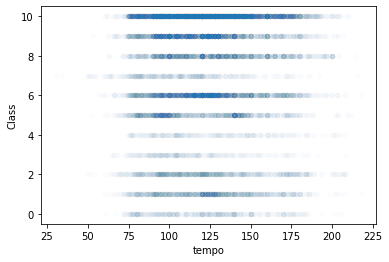

In [38]:
X_train.plot(kind = 'scatter', x = 'tempo', y = 'Class', alpha=.01)
pass

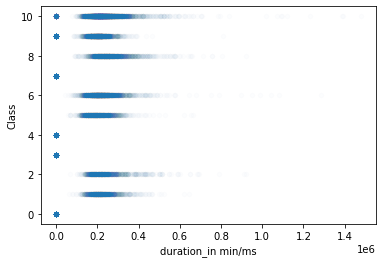

In [39]:
X_train.plot(kind = 'scatter', x = 'duration_in min/ms', y = 'Class', alpha=.01)
pass

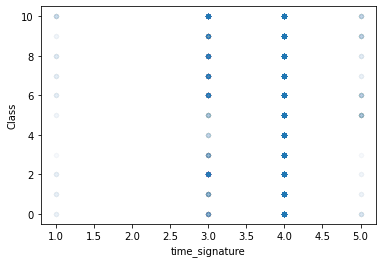

In [40]:
X_train.plot(kind = 'scatter', x = 'time_signature', y = 'Class', alpha=.01)
pass

In [41]:
X_train

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
7126,45.0,0.484,0.832,11.0,-7.348,0,0.0414,0.14000,0.000001,0.166,0.340,130.038,165213.000000,4,6
17771,53.0,0.471,0.490,10.0,-9.044,1,0.0469,0.62500,0.000608,0.157,0.386,116.436,222816.000000,4,1
11401,70.0,0.599,0.790,4.0,-3.580,1,0.0430,0.00257,0.001810,0.312,0.961,103.783,188067.000000,4,10
2288,64.0,0.716,0.640,2.0,-8.726,1,0.0250,0.56500,0.001390,0.127,0.485,105.012,4.342283,4,3
5927,37.0,0.324,0.843,4.0,-9.096,0,0.0680,0.00125,0.000002,0.360,0.389,190.149,173091.000000,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,47.0,0.470,0.862,6.0,-5.494,0,0.1120,0.00504,0.003910,0.059,0.473,162.226,222836.000000,4,10
11964,45.0,0.606,0.704,6.0,-4.615,1,0.0519,0.02920,0.000007,0.105,0.686,106.960,195722.000000,4,10
5390,43.0,0.565,0.468,8.0,-8.959,0,0.0470,0.79400,0.905000,0.216,0.079,155.006,209806.000000,4,1
860,42.0,0.628,0.795,11.0,-6.941,0,0.0282,0.00406,0.000014,0.132,0.731,134.999,308387.000000,4,10


In [42]:
# Уберем из обучающей выборки незначащие признаки
X_train = X_train.drop(['key', 'mode','time_signature','Class'], axis=1)

In [43]:
X_train.head()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
7126,45.0,0.484,0.832,-7.348,0.0414,0.14000,0.000001,0.166,0.340,130.038,165213.000000
17771,53.0,0.471,0.490,-9.044,0.0469,0.62500,0.000608,0.157,0.386,116.436,222816.000000
11401,70.0,0.599,0.790,-3.580,0.0430,0.00257,0.001810,0.312,0.961,103.783,188067.000000
2288,64.0,0.716,0.640,-8.726,0.0250,0.56500,0.001390,0.127,0.485,105.012,4.342283
5927,37.0,0.324,0.843,-9.096,0.0680,0.00125,0.000002,0.360,0.389,190.149,173091.000000


# 6 Масштабирование признаков

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [45]:
X_train.describe()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
count,1.349700e+04,1.349700e+04,1.349700e+04,1.349700e+04,1.349700e+04,1.349700e+04,1.349700e+04,1.349700e+04,1.349700e+04,1.349700e+04,1.349700e+04
mean,3.378789e-16,-5.420532e-16,-5.867558e-16,-8.562428e-17,2.870770e-18,3.033639e-17,2.155052e-16,-4.961127e-19,1.325490e-16,9.168368e-17,-4.649167e-17
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-2.515110e+00,-2.913847e+00,-2.826874e+00,-6.684519e+00,-6.783549e-01,-7.949900e-01,-4.934212e-01,-1.153039e+00,-1.946550e+00,-3.116420e+00,-1.796668e+00
25%,-6.709716e-01,-6.731458e-01,-6.448894e-01,-3.932625e-01,-5.337208e-01,-7.809790e-01,-4.924068e-01,-6.196791e-01,-7.844941e-01,-7.789842e-01,-3.079153e-01
50%,-3.704895e-02,1.333624e-02,1.606018e-01,2.199257e-01,-3.867349e-01,-5.322040e-01,-4.792092e-01,-4.182573e-01,-1.588356e-02,-8.650579e-02,7.671908e-02
75%,6.545030e-01,6.937965e-01,8.382372e-01,6.712833e-01,3.423253e-02,5.964197e-01,-2.803720e-01,3.849203e-01,7.735002e-01,6.559142e-01,4.659352e-01
max,3.190193e+00,2.680981e+00,1.434897e+00,2.280994e+00,1.028679e+01,2.420425e+00,3.127746e+00,4.996917e+00,2.073906e+00,3.210385e+00,1.144816e+01


In [46]:
X_train.head()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
7126,0.020580,-0.360014,0.718905,0.143799,-0.456112,-0.343024,-0.493421,-0.186089,-0.609999,0.251878,-0.315330
17771,0.481615,-0.438297,-0.738650,-0.272688,-0.391438,1.222716,-0.491214,-0.242562,-0.418885,-0.208668,0.201153
11401,1.461314,0.332490,0.539907,1.069107,-0.437298,-0.786693,-0.486844,0.730036,1.970040,-0.637082,-0.110416
2288,1.115538,1.037038,-0.099372,-0.194596,-0.648958,1.029016,-0.488371,-0.430807,-0.007574,-0.595470,-1.796633
5927,-0.440454,-1.323497,0.765786,-0.285457,-0.143326,-0.790955,-0.493416,1.031227,-0.406421,2.287159,-0.244694


# 7 Обучение

# Логистическая регрессия

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Уберем из тестовой выборки незначащие признаки
X_test = X_test.drop(['key', 'mode','time_signature','Class'], axis=1)

In [49]:
#Отмасштабируем признаки
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [50]:
#Тестируем
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.49
Accuracy of logistic regression classifier on train set: 0.50


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       172
           1       0.00      0.00      0.00       340
           2       0.45      0.32      0.37       340
           3       0.70      0.61      0.65       104
           4       0.39      0.51      0.45        84
           5       0.64      0.66      0.65       340
           6       0.42      0.24      0.30       626
           7       0.90      0.91      0.90       134
           8       0.58      0.53      0.55       473
           9       0.44      0.44      0.44       663
          10       0.44      0.69      0.53      1223

    accuracy                           0.49      4499
   macro avg       0.51      0.52      0.51      4499
weighted avg       0.46      0.49      0.47      4499



C:\Users\mario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Матрица ошибок
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)

MSE_train, MSE_test, R2_train, R2_test

(12.933614877380158,
 12.875083351855968,
 -0.26745934668770643,
 -0.22621985724774074)

# kNN

In [54]:

from sklearn.neighbors import KNeighborsClassifier

In [55]:
#Обучаем модель
KNN_model = KNeighborsClassifier(n_neighbors=10)

KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [56]:
#Тестируем
y_train_predict = KNN_model.predict(X_train)
y_test_predict  = KNN_model.predict(X_test)


In [64]:
print('Accuracy of KNN on test set: {:.2f}'.format(KNN_model.score(X_test, y_test)))
print('Accuracy of KNN on train set: {:.2f}'.format(KNN_model.score(X_train, y_train)))

Accuracy of KNN on test set: 0.47
Accuracy of KNN on train set: 0.57


In [65]:

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       172
           1       0.10      0.04      0.06       340
           2       0.46      0.35      0.40       340
           3       0.72      0.53      0.61       104
           4       0.45      0.65      0.54        84
           5       0.61      0.67      0.64       340
           6       0.31      0.27      0.29       626
           7       0.87      0.90      0.89       134
           8       0.50      0.52      0.51       473
           9       0.49      0.48      0.48       663
          10       0.45      0.56      0.49      1223

    accuracy                           0.47      4499
   macro avg       0.51      0.52      0.51      4499
weighted avg       0.45      0.47      0.46      4499



# Метод опорных векторов

In [59]:
from sklearn.svm import SVC

In [60]:

SVC_model = SVC()

In [61]:
#Обучаем
SVC_model.fit(X_train, y_train)

SVC()

In [62]:
#Тестируем
y_train_pr = SVC_model.predict(X_train)
y_test_pr  = SVC_model.predict(X_test)

In [66]:
print('Accuracy of SVC on test set: {:.2f}'.format(SVC_model.score(X_test, y_test)))
print('Accuracy of SVC on train set: {:.2f}'.format(SVC_model.score(X_train, y_train)))

Accuracy of SVC on test set: 0.53
Accuracy of SVC on train set: 0.56


In [67]:
print(classification_report(y_test, y_test_pr))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       172
           1       0.56      0.01      0.03       340
           2       0.59      0.32      0.41       340
           3       0.85      0.60      0.70       104
           4       0.50      0.64      0.57        84
           5       0.63      0.70      0.66       340
           6       0.46      0.24      0.32       626
           7       0.92      0.91      0.91       134
           8       0.66      0.45      0.54       473
           9       0.53      0.53      0.53       663
          10       0.45      0.77      0.56      1223

    accuracy                           0.53      4499
   macro avg       0.62      0.54      0.54      4499
weighted avg       0.55      0.53      0.50      4499

